In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries

from hsi.datafiles.hyperspectral_image_datafile import HyperspectralImageDataFile
from hsi.datafiles.envicontainer import ENVIContainer
from hsi.modules.clustering.hslic import HSLIC

### Cargar Datos
Se carga el contenido del archivo ENVI.

In [2]:
h = HyperspectralImageDataFile()
h.load_data('/home/canas/Repositories/Work/Data/hiperespectral/2002527916_Subset_Envi.hdr', 
            container=ENVIContainer())

/home/canas/Repositories/Work/Data/hiperespectral/2002527916_Subset_Envi.json missing


78 x 87 x 9 hyperspectralimagedatafile

### Correr HSLIC

In [3]:
h = h.duplicate('segmented')
hs = HSLIC(k=4, m=1, hsi=True, scale=False)

pc = h.get_point_cloud()
h.set_segments(hs.run(pc, iterations=100))

### Resultados

In [4]:
img = mark_boundaries(h.get_visible(), h.get_segments().T.reshape(h.get_cube_shape()[:2]))

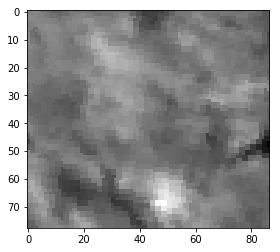

In [3]:
plt.imshow(h.get_visible())

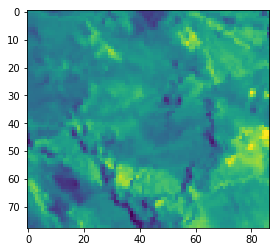

In [12]:
#plt.imshow(h.get_cube()[:, :, [2, 5, 8]])
import matplotlib.pylab as pl
pl.imshow(h.get_cube()[:, :, 1])

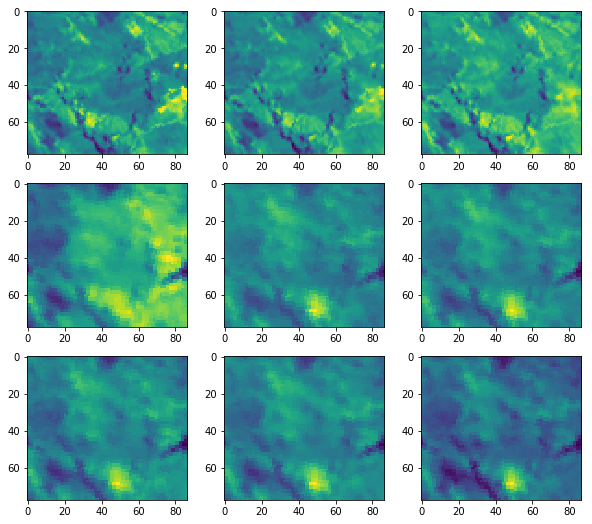

In [20]:
#plt.imshow(h.get_cube()[:, :, [2, 5, 8]])
import matplotlib.pylab as pl

plt.figure(figsize=(10, 9))
for k in range(1, 10):
    plt.subplot(3, 3, k)
    pl.imshow(h.get_cube()[:, :, k-1])